In [1]:
import pandas as pd 
import numpy as np
from FileOpener.CSVReader.CSVReader import CSVReader as csv
from FileOpener.backtester import FinancialBacktest, PfAnalysis, Plot

In [2]:
directory = 'CSVFile/FinancialData/Korea'

KSE_asset = csv.financial_reader('ASSET_KSE.csv', directory).shift(1).resample('A-MAR').last().dropna(axis=0, how ='all')
KSE_ret_earning = csv.financial_reader('RET_EARNING_KSE.csv', directory).shift(1).resample('A-MAR').last().dropna(axis=0, how ='all')

In [18]:
 csv.financial_reader('RET_EARNING_KSE.csv', directory).head()

,A000010,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000090,A000100,...,A298050,A298690,A300720,A306200,A900030,A900050,A900140,A950010,A950070,A950100
Code,,,,,,,,,,,,,,,,,,,,,
2000-03-31,-743787000.0,34096419.0,-1.615293e+09,-68481774.0,48239514.0,70735582.0,NaN,84283217.0,NaN,120946604.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-30,-835698000.0,34696960.0,-1.814946e+09,-72950219.0,40889838.0,NaN,98023148.0,NaN,NaN,125504431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-30,-820273000.0,35284933.0,-1.942318e+09,-73187493.0,45687857.0,45246146.0,105420000.0,-8412325.0,NaN,136530650.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-31,-842345000.0,36007969.0,-4.546860e+08,-122167778.0,32753869.0,40433581.0,151879454.0,-16387771.0,NaN,144639550.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-31,-828893000.0,36836997.0,-3.421570e+08,-117720261.0,33175965.0,47555581.0,152526000.0,-47912498.0,NaN,153164088.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
KSE_ret_earning_div_asset = KSE_ret_earning.div(KSE_asset)
KSE_ret_earning_div_asset.head()

,A000010,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000090,A000100,...,A298050,A298690,A300720,A306200,A900030,A900050,A900140,A950010,A950070,A950100
Code,,,,,,,,,,,,,,,,,,,,,
2001-03-31,-0.016736,0.141824,-0.006510,-0.997359,0.058028,0.024492,0.141506,-0.009147,NaN,0.268775,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-31,-0.006893,0.163151,0.002701,-0.942595,0.017367,0.041452,0.181508,-0.081476,NaN,0.315889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-03-31,-0.013909,0.226968,0.009667,-0.269138,0.022620,0.054011,0.209285,-0.047281,NaN,0.365831,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-03-31,-0.031840,0.247371,0.017413,-0.272509,0.022859,0.054820,0.223303,-1.615008,NaN,0.420337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-31,-0.024784,0.273909,0.029738,-0.228310,0.004375,0.053821,0.264554,-2.675033,NaN,0.423578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Rank the Ret-Earning Ratio

Ret_Earning / Div

In [8]:
KSE_cash_ret_earning_rank = FinancialBacktest.screen_rank(KSE_ret_earning_div_asset)

## Bring the Price

In [9]:
prc_dir = 'CSVFile/Price/Korea/Stocks/'
KSE_price = csv.price_reader('KOSPI_FROM_1998_close.csv', prc_dir)

In [10]:
KSE_rt = FinancialBacktest(KSE_price)

In [12]:
tier = {}
for i in range(1, 11):

    tier[f"Tier {i}"] = KSE_rt.backtest(KSE_cash_ret_earning_rank == i, 'A-MAR', 'A-MAR') 

D:\WiseData\FileOpener\backtester.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ret.loc[:'1998-05-23'][ret.loc[:'1998-05-23'] > 1.08] = 1.08
C:\Users\fnguide\Anaconda3\lib\site-packages\pandas\core\frame.py:3163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
D:\WiseData\FileOpener\backtester.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

In [13]:
Perf_data = pd.DataFrame(tier) 
test = PfAnalysis(Perf_data)

In [14]:
pd.DataFrame([test.totalReturn().rename('Total Return'),
              test.mean_return().rename('Arithmetic Mean Return'),
              test.geo_mean_return().rename('Geometric Mean Return'),
              test.median_return().rename('Median Return'),
              test.volatility().rename('Vol.'),
              test.upordownvol().rename('Upside Vol.'),
              test.upordownvol(option=False).rename('Downside Vol.'),                  
              abs(test.maxDrawDown()).rename('MDD')]).applymap('{: .2%}'.format)

,Tier 1,Tier 2,Tier 3,Tier 4,Tier 5,Tier 6,Tier 7,Tier 8,Tier 9,Tier 10
Total Return,694.57%,1272.48%,795.08%,1085.40%,1008.18%,1177.94%,892.68%,633.48%,66.32%,-99.38%
Arithmetic Mean Return,13.94%,18.76%,15.87%,18.59%,17.47%,19.39%,18.56%,18.90%,10.84%,-16.90%
Geometric Mean Return,12.20%,15.66%,12.95%,14.73%,14.30%,15.21%,13.60%,11.71%,2.87%,-24.63%
Median Return,13.93%,13.67%,7.80%,9.30%,14.29%,11.47%,10.36%,8.47%,3.56%,-17.51%
Vol.,15.93%,17.56%,18.13%,19.19%,20.02%,21.70%,23.09%,23.19%,23.47%,24.06%
Upside Vol.,9.58%,10.41%,11.01%,11.58%,12.23%,12.98%,13.93%,14.25%,13.57%,13.39%
Downside Vol.,14.30%,15.79%,16.62%,17.65%,17.82%,19.63%,20.60%,20.57%,21.56%,20.70%
MDD,45.99%,49.41%,53.35%,56.81%,59.42%,58.23%,62.81%,66.70%,68.89%,82.53%


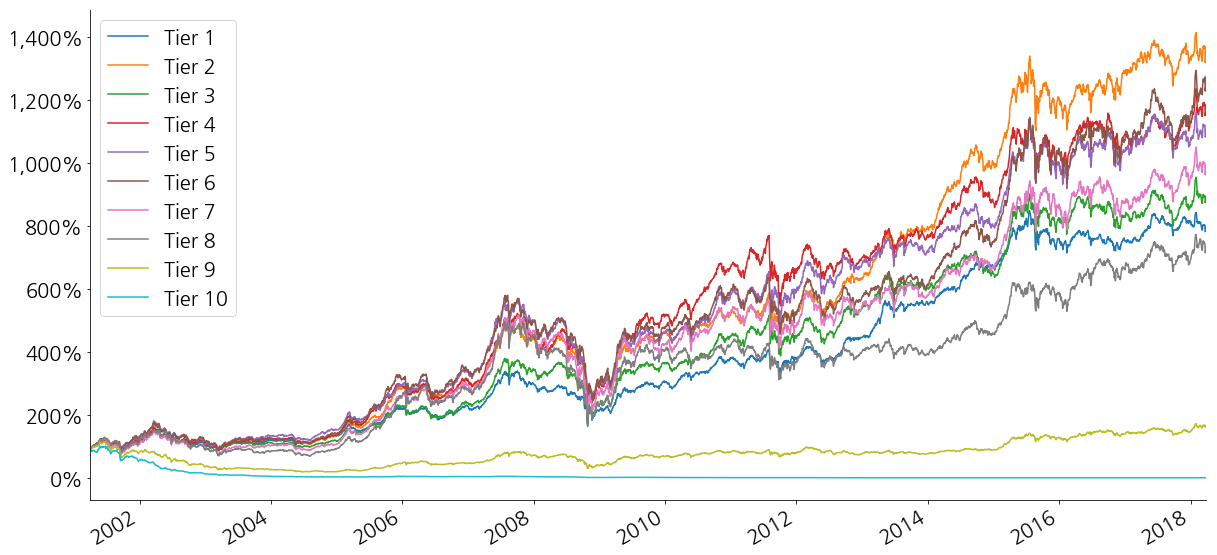

In [16]:
fig, ax = Plot().TimeSeries()
Perf_data.cumprod().plot(ax=ax)